In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# set random seed for reproducibility
torch.manual_seed(42)

In [3]:
df = pd.read_csv("/content/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [4]:
df.shape

(6000, 785)

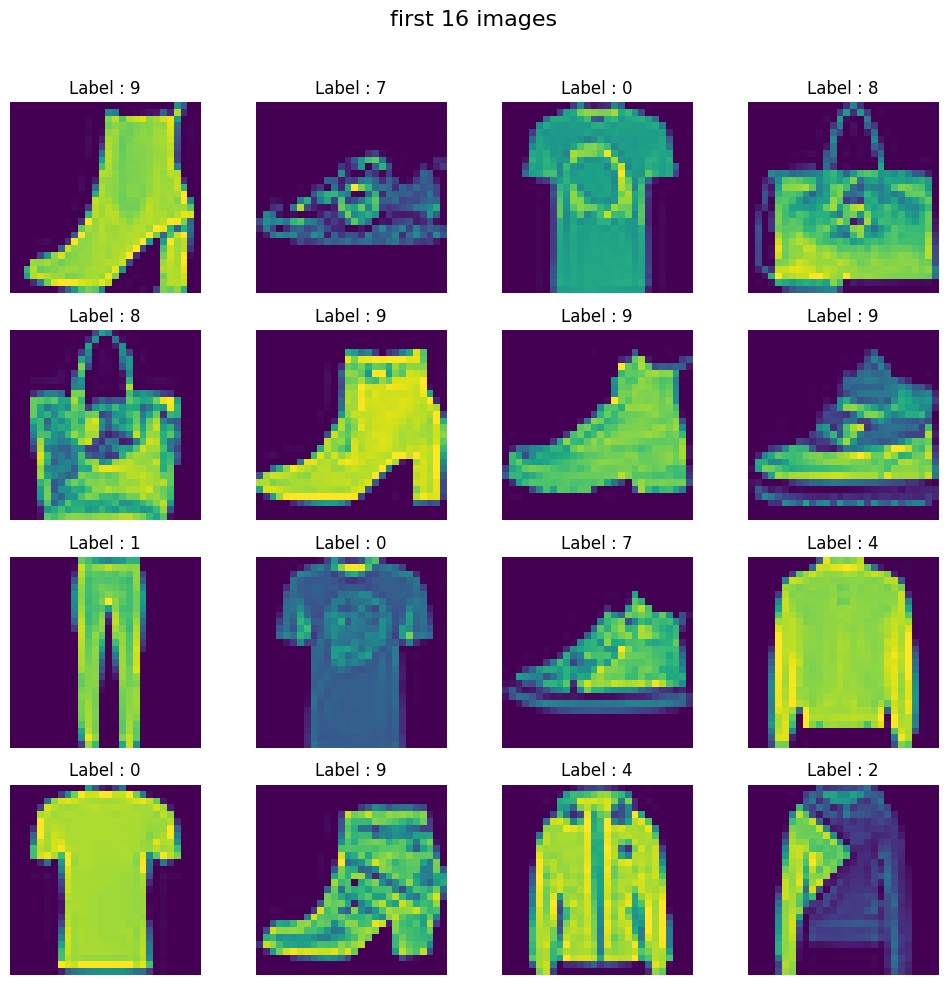

In [5]:
# create 4*4 grid of images
fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("first 16 images",fontsize=16)

# plot the first 16 images from dataset
for i,ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28) #reshape 28*28
  ax.imshow(img) #display in greyscale
  ax.axis('off') # remove axis for clearner look
  ax.set_title(f"Label : {df.iloc[i,0]}")

plt.tight_layout(rect=[0,0,1,0.96]) #adjust layout to fit the title
plt.show()

In [6]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [7]:
X

array([[  0,   0,   0, ..., 165,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [8]:
type(X)

numpy.ndarray

In [9]:
type(y)

numpy.ndarray

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# scaling the features
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
# create CustomDataset class
class CustomDataset(Dataset):

  def __init__(self,features,labels):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx],self.labels[idx]

In [13]:
# create train dataset
train_dataset = CustomDataset(X_train,y_train)

In [14]:
len(train_dataset)

4800

In [22]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [15]:
# create test dataset
test_dataset = CustomDataset(X_test,y_test)

In [21]:
len(test_dataset)

1200

In [23]:
# create train and test dataloader
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [25]:
# define nn
# no need to mention softmax at the end ,it's by default in pytorch
class MYNN(nn.Module):

  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,x):

    return self.model(x)

In [28]:
# set learning rate and epochs
learning_rate = 0.1
epochs = 100

In [29]:
# instantiate the model

model = MYNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(),lr=learning_rate)

In [30]:
len(train_loader) # to calculate no of batches

150

In [33]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features,batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs,batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # grad update
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch :{epoch + 1}, Loss: {avg_loss}")


Epoch :1, Loss: 0.004580123959458433
Epoch :2, Loss: 0.004998906896992897
Epoch :3, Loss: 0.005866042588022538
Epoch :4, Loss: 0.004008966939387998
Epoch :5, Loss: 0.0027649430455251906
Epoch :6, Loss: 0.002728855002011793
Epoch :7, Loss: 0.0022875374047725927
Epoch :8, Loss: 0.0021279819442133886
Epoch :9, Loss: 0.0018700156388998341
Epoch :10, Loss: 0.0017660406278446317
Epoch :11, Loss: 0.0017046974217131113
Epoch :12, Loss: 0.0016303838582825848
Epoch :13, Loss: 0.0015247766473718608
Epoch :14, Loss: 0.0015055870584425673
Epoch :15, Loss: 0.0013524035997094566
Epoch :16, Loss: 0.001268817701614656
Epoch :17, Loss: 0.0012335505596517274
Epoch :18, Loss: 0.0012008749690721743
Epoch :19, Loss: 0.0011742754366908532
Epoch :20, Loss: 0.0011334957264383168
Epoch :21, Loss: 0.0010649586371437182
Epoch :22, Loss: 0.0010497119195739895
Epoch :23, Loss: 0.0009963445804896764
Epoch :24, Loss: 0.0010011932553121974
Epoch :25, Loss: 0.0009551555051196677
Epoch :26, Loss: 0.0009210935064281027
E

In [35]:
# set model to evaluate mode
model.eval()

MYNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [36]:
len(test_loader) # test bactches

38

In [38]:
# evaluation code

total = 0
correct = 0

with torch.no_grad():

  for batch_features,batch_labels in test_loader:

    outputs = model(batch_features)

    _,predicted = torch.max(outputs,1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted ==batch_labels).sum().item()

print(f'accuracy:{correct/total}')


accuracy:0.8375
